100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [00:03<00:00, 15.28it/s]


nzslices = 47


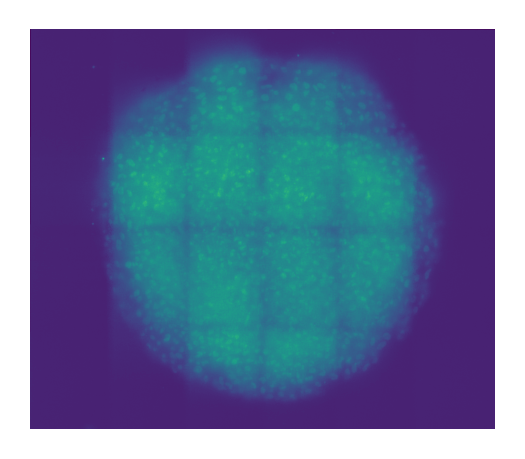

In [1]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
from cellpose import utils, io, models, plot
from pathlib import Path

# REPLACE FILES WITH YOUR IMAGE PATHS
#dataDir = Path("Y:/Seth/210827_Smad4GFP_BMP_IWP2_live/fixed")

dataDir = Path(os.getcwd())

bare = 'stitched_p%.4d_w%.4d_t%.4d.tif'
nucChannel = 0 #nuclear channel
npos = 12 #number of positions
ntime = 1
files = []
for ii in range(0,npos):
    for ti in range(0,ntime):
        name = bare % (ii,nucChannel,ti)
        filename = dataDir / name
        files.append(filename)
    

#filename = dataDir / 'stitched_p0000_w0000_t0000.tif'
#files.append(filename)
#filename = dataDir / 'stitched_p0001_w0000_t0000.tif'
#files.append(filename)
# view 1 image
img = io.imread(files[0])
nzslices = img.shape[0] #number of z slices
print('nzslices =',nzslices)
plt.figure(figsize=(2,2))
plt.imshow(img[1,:,:])
plt.axis('off')
plt.show()

In [2]:
print(img.shape)
#files

(56, 2553, 2970)


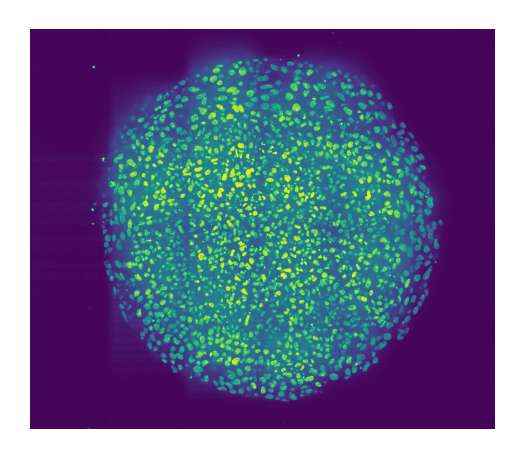

In [2]:
#display image with rescaled + saturated intensity
from skimage import exposure
im = img[3,:,:]
p1, p99 = np.percentile(im, (1, 99))
J = exposure.rescale_intensity(im, in_range=(p1, p99))

plt.figure(figsize=(2,2))
plt.imshow(J)
plt.axis('off')
plt.show()

In [3]:
#run the model once
#if you set diameter=None in the call to model.eval, it will run the model once to estimate the size of nuclei and run again
#to do actual segmentation but this is slow and works less well on the micropattern than on sparser disordered cells
#I generally estimate in Fiji instead; for 40x, nuclear diameter generally ranges from ~25-70 pixels
model = models.Cellpose(gpu=True, model_type='nuclei')
chan = [0,0] #use chan = [0,0] for nuclear segmentation only
diam = 35

im = img[3,:,:]
p1, p99 = np.percentile(im, (1, 99))
J = exposure.rescale_intensity(im, in_range=(p1, p99))
masks, flows, styles, diams = model.eval(J, diameter=diam, channels=chan, net_avg=True)

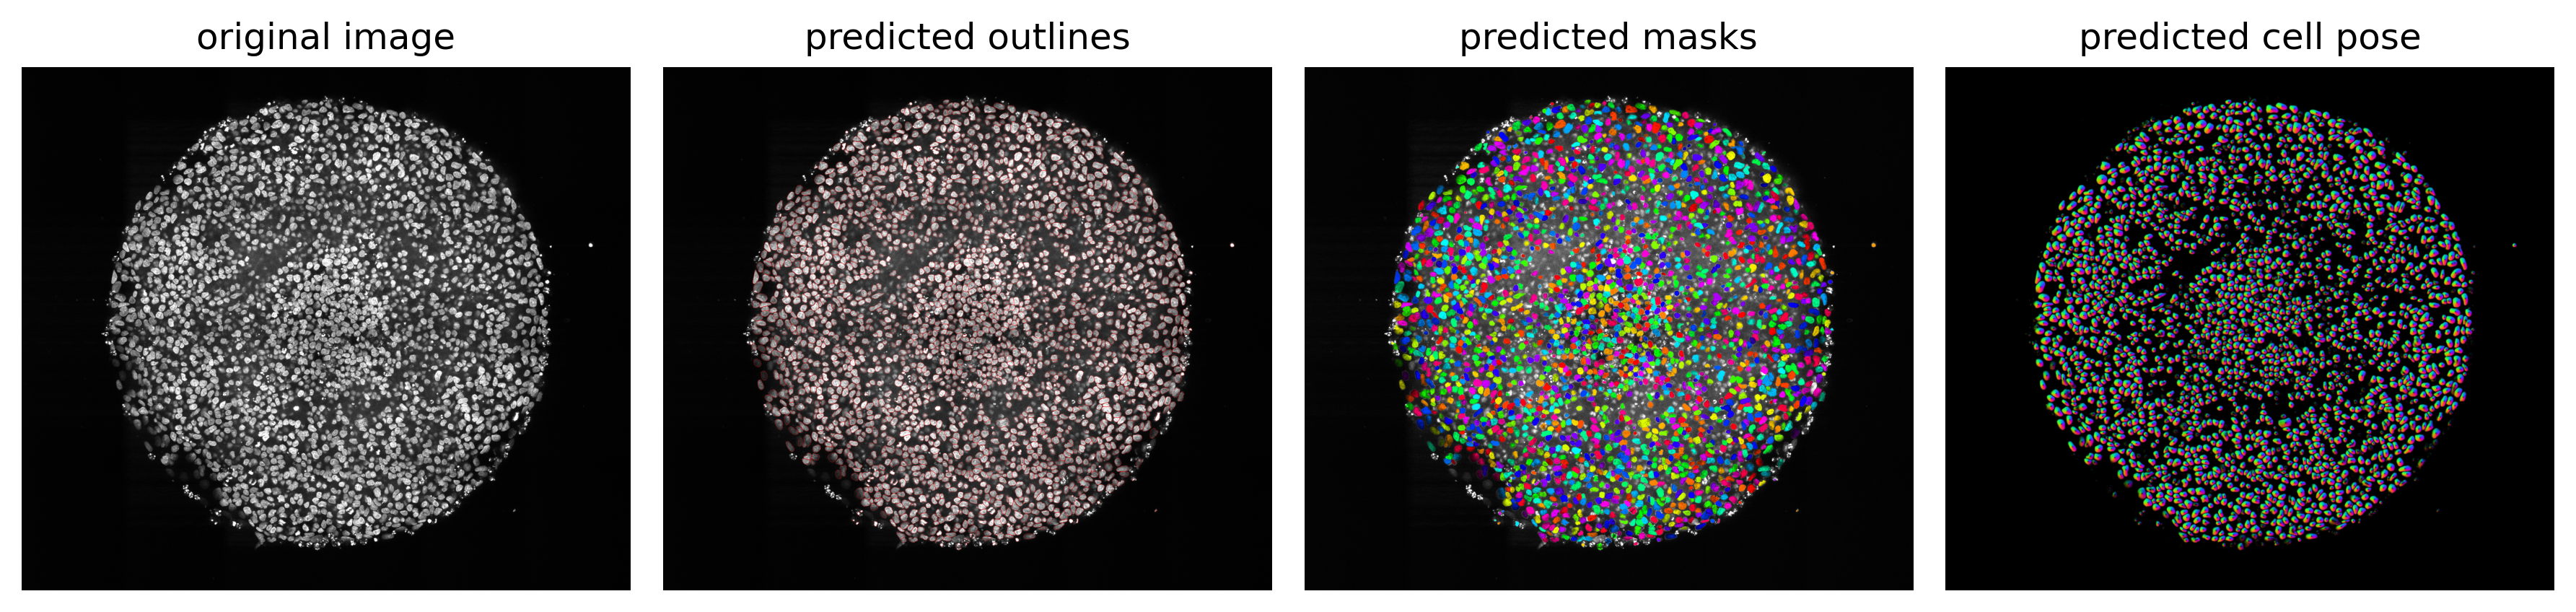

In [6]:
# DISPLAY RESULTS
#The built-in way of doing this is extremely slow, I've been saving results and visualizing in matlab instead
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, J, masks, flows[0], channels=chan)
plt.tight_layout()
plt.show()

In [5]:
files[6:12]

[WindowsPath('v:/Bohan-05/MesoMP_Data_Repository/230809_96hExp3e_45k_ISL1_SOX2_TBXT_48_72_96h/stitched_p0006_w0000_t0000.tif'),
 WindowsPath('v:/Bohan-05/MesoMP_Data_Repository/230809_96hExp3e_45k_ISL1_SOX2_TBXT_48_72_96h/stitched_p0007_w0000_t0000.tif'),
 WindowsPath('v:/Bohan-05/MesoMP_Data_Repository/230809_96hExp3e_45k_ISL1_SOX2_TBXT_48_72_96h/stitched_p0008_w0000_t0000.tif'),
 WindowsPath('v:/Bohan-05/MesoMP_Data_Repository/230809_96hExp3e_45k_ISL1_SOX2_TBXT_48_72_96h/stitched_p0009_w0000_t0000.tif'),
 WindowsPath('v:/Bohan-05/MesoMP_Data_Repository/230809_96hExp3e_45k_ISL1_SOX2_TBXT_48_72_96h/stitched_p0010_w0000_t0000.tif'),
 WindowsPath('v:/Bohan-05/MesoMP_Data_Repository/230809_96hExp3e_45k_ISL1_SOX2_TBXT_48_72_96h/stitched_p0011_w0000_t0000.tif')]

In [4]:
# RUN CELLPOSE

#from cellpose import models, io

# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=True, model_type='nuclei')
chan = [0,0]

#base = os.path.splitext(filename)[0]

# or in a loop
#for chan, filename in zip(channels, files):
for filename in files:
    base = os.path.splitext(filename)[0]
    print(base)
    img = io.imread(filename)
    nzslices = img.shape[0]
    for zi in range(0,nzslices):
        im = img[zi,:,:]
        p1, p99 = np.percentile(im, (1, 99))
        J = exposure.rescale_intensity(im, in_range=(p1, p99))
        masks, flows, styles, diams = model.eval(J, diameter=diam, channels=chan, net_avg=True)
        # save results as png
        masks = masks.astype(np.uint16) if masks.max()<2**16-1 else masks.astype(np.uint32)
        io.imsave(base + '_z%.4d' % zi + '_cp_masks.png', masks)

Z:\Shared-03\Hina\240208_96hMesoMP_SideExp14pr_SMAD23_GATA3_FOXF1_MP96\stitched_p0000_w0000_t0000


100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [00:02<00:00, 22.03it/s]


Z:\Shared-03\Hina\240208_96hMesoMP_SideExp14pr_SMAD23_GATA3_FOXF1_MP96\stitched_p0001_w0000_t0000


100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [00:02<00:00, 20.29it/s]


Z:\Shared-03\Hina\240208_96hMesoMP_SideExp14pr_SMAD23_GATA3_FOXF1_MP96\stitched_p0002_w0000_t0000


100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [00:02<00:00, 17.73it/s]


Z:\Shared-03\Hina\240208_96hMesoMP_SideExp14pr_SMAD23_GATA3_FOXF1_MP96\stitched_p0003_w0000_t0000


100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:02<00:00, 16.75it/s]


Z:\Shared-03\Hina\240208_96hMesoMP_SideExp14pr_SMAD23_GATA3_FOXF1_MP96\stitched_p0004_w0000_t0000


100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 20.50it/s]


Z:\Shared-03\Hina\240208_96hMesoMP_SideExp14pr_SMAD23_GATA3_FOXF1_MP96\stitched_p0005_w0000_t0000


100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:03<00:00, 11.81it/s]


Z:\Shared-03\Hina\240208_96hMesoMP_SideExp14pr_SMAD23_GATA3_FOXF1_MP96\stitched_p0006_w0000_t0000


100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:02<00:00, 14.97it/s]


Z:\Shared-03\Hina\240208_96hMesoMP_SideExp14pr_SMAD23_GATA3_FOXF1_MP96\stitched_p0007_w0000_t0000


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:04<00:00, 10.26it/s]


Z:\Shared-03\Hina\240208_96hMesoMP_SideExp14pr_SMAD23_GATA3_FOXF1_MP96\stitched_p0008_w0000_t0000


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:03<00:00, 16.06it/s]


Z:\Shared-03\Hina\240208_96hMesoMP_SideExp14pr_SMAD23_GATA3_FOXF1_MP96\stitched_p0009_w0000_t0000


100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [00:04<00:00, 10.94it/s]


Z:\Shared-03\Hina\240208_96hMesoMP_SideExp14pr_SMAD23_GATA3_FOXF1_MP96\stitched_p0010_w0000_t0000


100%|██████████████████████████████████████████████████████████████████████████████████| 53/53 [00:04<00:00, 12.97it/s]


Z:\Shared-03\Hina\240208_96hMesoMP_SideExp14pr_SMAD23_GATA3_FOXF1_MP96\stitched_p0011_w0000_t0000


100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [00:03<00:00, 15.52it/s]


*# base = os.path.splitext(filename)[0]
for ci in range(0,2):
    print(ci)
    for zi in range(0,nzslices):
        print(base + '_z%.4d' % zi + '_cp_masks.png')


In [8]:
files

[WindowsPath('Y:/Seth/220803_Smad1RFP_BMP_IWP2_MP_live/stitched_p0000_w0000_t0000.tif'),
 WindowsPath('Y:/Seth/220803_Smad1RFP_BMP_IWP2_MP_live/stitched_p0000_w0000_t0001.tif'),
 WindowsPath('Y:/Seth/220803_Smad1RFP_BMP_IWP2_MP_live/stitched_p0000_w0000_t0002.tif'),
 WindowsPath('Y:/Seth/220803_Smad1RFP_BMP_IWP2_MP_live/stitched_p0000_w0000_t0003.tif'),
 WindowsPath('Y:/Seth/220803_Smad1RFP_BMP_IWP2_MP_live/stitched_p0000_w0000_t0004.tif'),
 WindowsPath('Y:/Seth/220803_Smad1RFP_BMP_IWP2_MP_live/stitched_p0000_w0000_t0005.tif'),
 WindowsPath('Y:/Seth/220803_Smad1RFP_BMP_IWP2_MP_live/stitched_p0000_w0000_t0006.tif'),
 WindowsPath('Y:/Seth/220803_Smad1RFP_BMP_IWP2_MP_live/stitched_p0000_w0000_t0007.tif'),
 WindowsPath('Y:/Seth/220803_Smad1RFP_BMP_IWP2_MP_live/stitched_p0000_w0000_t0008.tif'),
 WindowsPath('Y:/Seth/220803_Smad1RFP_BMP_IWP2_MP_live/stitched_p0000_w0000_t0009.tif'),
 WindowsPath('Y:/Seth/220803_Smad1RFP_BMP_IWP2_MP_live/stitched_p0000_w0000_t0010.tif'),
 WindowsPath('Y:/Seth

In [21]:
chan = [0,0]
p1, p99 = np.percentile(img, (1, 99))
J = exposure.rescale_intensity(img, in_range=(p1, p99))
masks, flows, styles, diams = model.eval(J, channels=chan, z_axis=0, diameter=35, do_3D=True, anisotropy=8, net_avg=True, min_size=15)


2021-09-20 11:32:59,079 [INFO] ~~~ FINDING MASKS ~~~
2021-09-20 11:32:59,080 [INFO] multi-stack tiff read in as having 5 planes 1 channels
2021-09-20 11:33:00,906 [INFO] running YX: 5 planes of size (3635, 3635)
2021-09-20 11:33:15,766 [INFO] 100%|##########| 5/5 [00:03<00:00,  1.43it/s]
2021-09-20 11:33:17,366 [INFO] running ZY: 3635 planes of size (5, 3635)
2021-09-20 11:36:57,913 [INFO] 100%|##########| 1212/1212 [00:54<00:00, 22.43it/s]
2021-09-20 11:37:03,394 [INFO] running ZX: 3635 planes of size (5, 3635)
2021-09-20 11:40:42,920 [INFO] 100%|##########| 1212/1212 [00:53<00:00, 22.60it/s]
2021-09-20 11:40:49,709 [INFO] network run in 470.33s
2021-09-20 11:42:34,119 [INFO] masks created in 104.41s
2021-09-20 11:42:41,087 [INFO] >>>> TOTAL TIME 582.01 sec


In [22]:
filename = files[0]
base = os.path.splitext(filename)[0]
masks = masks.astype(np.uint16) if masks.max()<2**16-1 else masks.astype(np.uint32)
io.imsave(base + '_rescaled_multiZ_cp_masks.tif', masks)

In [18]:
base + '_multiZ_cp_masks.png'

'Y:\\Seth\\210827_Smad4GFP_BMP_IWP2_live\\fixed\\stitched_p0000_w0000_t0000_multiZ_cp_masks.png'